In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import os
import glob
import cv2
import numpy as np
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D,MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.regularizers import l2

In [ ]:
import pandas as pd    
train = pd.read_csv('/content/drive/MyDrive/test/train.csv')
data = train.iloc(0)
data_wanted = train.iloc[0:113]
data_cleaned =  data_wanted.iloc[:,0:7]
data_cleaned

,index,cases_medellin,cases_diff,cases_intensity,YEAR,YearWeek,Image_Path
0,1,103,-20,Decreased,2015,201544,image_2015-11-01.jpg
1,2,121,18,Increased,2015,201545,image_2015-11-08.jpg
2,3,105,-16,Decreased,2015,201546,image_2015-11-15.jpg
3,4,97,-8,Decreased,2015,201547,image_2015-11-22.jpg
4,5,135,38,Increased,2015,201548,image_2015-11-29.jpg
...,...,...,...,...,...,...,...
108,109,21,-7,Decreased,2017,201748,image_2017-11-26.jpg
109,110,30,9,Increased,2017,201749,image_2017-12-03.jpg
110,111,14,-16,Decreased,2017,201750,image_2017-12-10.jpg
111,112,22,8,Increased,2017,201751,image_2017-12-17.jpg


In [ ]:
from tqdm import tqdm
from keras.preprocessing import image
train_image = []
for i in tqdm(range(data_cleaned.shape[0])):
    img = image.load_img('/content/drive/MyDrive/images/'+train['Image_Path'][i],target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 113/113 [00:02<00:00, 41.64it/s]


In [ ]:
X.shape
X = np.asarray(X).astype(np.float32)
X.reshape(400,400,-1)

array([[[0.32941177, 0.4509804 , 0.04313726, ..., 0.23137255,
         0.27058825, 0.03529412],
        [0.23137255, 0.27058825, 0.03529412, ..., 0.20392157,
         0.2627451 , 0.03137255],
        [0.20392157, 0.2627451 , 0.03137255, ..., 0.27450982,
         0.29411766, 0.04313726],
        ...,
        [0.14509805, 0.19215687, 0.        , ..., 0.08627451,
         0.1254902 , 0.        ],
        [0.07843138, 0.11372549, 0.        , ..., 0.20784314,
         0.24705882, 0.        ],
        [0.21960784, 0.25882354, 0.01176471, ..., 0.37254903,
         0.49803922, 0.00784314]],

       [[0.1764706 , 0.21176471, 0.03529412, ..., 0.44705883,
         0.56078434, 0.01176471],
        [0.45490196, 0.5686275 , 0.01960784, ..., 0.09803922,
         0.11372549, 0.02352941],
        [0.09019608, 0.10196079, 0.01960784, ..., 0.09803922,
         0.11764706, 0.02745098],
        ...,
        [0.39607844, 0.5411765 , 0.03529412, ..., 0.15294118,
         0.19607843, 0.02745098],
        [0.1

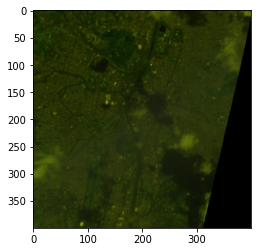

In [ ]:
plt.imshow(X[2])

In [ ]:
y = np.array(data_cleaned.drop(['Image_Path', 'index','cases_medellin','cases_diff','YEAR','YearWeek'],axis=1))

In [ ]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
y = data_cleaned['cases_intensity']
y = label_encoder.fit_transform(data_cleaned['cases_intensity'])
y

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [ ]:
train_y = y_train.astype('float32').reshape((-1,1))
test_y = y_test.astype('float32').reshape((-1,1))

In [ ]:
X_train.view()
train_X = X_train.astype(np.float32)
train_X.view()
test_X =  X_test.astype(np.float32)

# **SVM** **Implementation**

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(400,400,3)))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Flatten())
model.add(Dense(128,activation="relu"))

#Output layer
model.add(Dense(1,kernel_regularizer=l2(0.01),activation = "linear"))

In [ ]:
model.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

In [ ]:
model.fit(train_X, train_y, epochs=10, validation_data=(X_test, test_y), batch_size=1)

Epoch 1/10
101/101 [==============================] - 24s 224ms/step - loss: 1.6511 - accuracy: 0.5248 - val_loss: 1.0492 - val_accuracy: 0.6667
Epoch 2/10
101/101 [==============================] - 16s 159ms/step - loss: 0.9943 - accuracy: 0.5347 - val_loss: 1.2749 - val_accuracy: 0.6667
Epoch 3/10
101/101 [==============================] - 11s 107ms/step - loss: 1.0187 - accuracy: 0.5545 - val_loss: 0.8804 - val_accuracy: 0.6667
Epoch 4/10
101/101 [==============================] - 11s 107ms/step - loss: 1.0192 - accuracy: 0.5347 - val_loss: 0.9139 - val_accuracy: 0.6667
Epoch 5/10
101/101 [==============================] - 11s 106ms/step - loss: 0.9275 - accuracy: 0.5446 - val_loss: 0.9781 - val_accuracy: 0.6667
Epoch 6/10
101/101 [==============================] - 11s 106ms/step - loss: 0.8353 - accuracy: 0.5842 - val_loss: 0.9457 - val_accuracy: 0.6667
Epoch 7/10
101/101 [==============================] - 11s 105ms/step - loss: 0.8609 - accuracy: 0.6436 - val_loss: 1.0814 - val_ac

In [ ]:
img = image.load_img('/content/drive/MyDrive/images/image_2016-08-07.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

Decreased (0.0526)


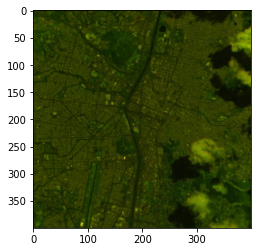

In [ ]:
classes = np.array(data_cleaned['cases_intensity'])
proba = model.predict(img.reshape(1,400,400,3))
top= np.argsort(proba[0])[:-3:-1]
print("{}".format(classes[top[0]])+" ({:.3})".format(proba[0][top[0]]))

plt.imshow(img)

In [ ]:
model.predict(X_test)

array([[-0.68179774],
       [-1.1707672 ],
       [ 0.05264918],
       [ 0.72912204],
       [ 0.11045734],
       [-0.22767647],
       [-0.7250472 ],
       [-0.7965263 ],
       [-0.48419708],
       [-1.4497234 ],
       [-1.0740687 ],
       [-1.6303688 ]], dtype=float32)

In [ ]:
import math
from sklearn.metrics import confusion_matrix
def check_accuracy(model, setX, actual, print_images=True):
    predicted = np.array([int(x[0] > 0.5) for x in model.predict(setX)])
    if print_images:
        rows = math.ceil(len(predicted)/10.)
        plt.figure(figsize=(20, 3 * rows))
        for i in range(len(predicted)):
            plt.subplot(rows, 10, i+1)
            plt.imshow(setX[i])
            plt.title("pred "+str(predicted[i])+" actual "+str(actual[i]))
        
    confusion = confusion_matrix(actual, predicted)
    tn, fp, fn, tp = confusion.ravel()
    print("True positive:", tp, ", True negative:", tn,
          ", False positive:", fp, ", False negative:", fn)

    print("Total accuracy:", np.sum(predicted==actual) / len(predicted) * 10., "%")
    return (tn, fp, fn, tp)


True positive: 0 , True negative: 7 , False positive: 1 , False negative: 4
Total accuracy: 76.66666666666667 %


(7, 1, 4, 0)

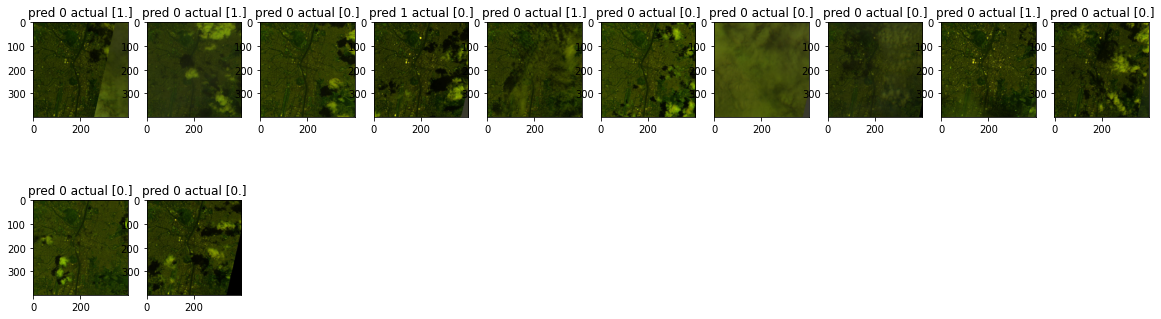

In [ ]:
check_accuracy(model, test_X,test_y)

## **Logistic Regression**

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns

In [ ]:
logit_model = LogisticRegression(multi_class = 'multinomial', max_iter = 1e3, C = 1, solver = 'sag')

In [ ]:
a,b,c,d = train_X.shape
changed_x = train_X.reshape(a,b*c*d)

In [ ]:
test_y.shape
train_y.shape
a,b = test_y.shape
c,d = train_y.shape
changed_test_y = test_y.reshape(a*b)
changed_train_y = train_y.reshape(c*d)


(12, 1)

(101, 1)

In [ ]:
# logit_model.fit(changed_x, changed_train_y) logit_model.score(test_X, changed_test_y)

In [ ]:
# yhat = logit_model.predict(X_test)
# yhat

# Pre trained models

In [ ]:
from tensorflow.keras.applications import VGG19 #For Transfer Learning
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
base_model = VGG19(include_top = False, weights = 'imagenet', input_shape = (400,400,3), classes = train_y.shape[1])

In [ ]:
model= Sequential()
model.add(base_model) 
model.add(Flatten()) 

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 12, 12, 512)       20024384  
                                                                 
 flatten_1 (Flatten)         (None, 73728)             0         
                                                                 
Total params: 20,024,384
Trainable params: 20,024,384
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(Dense(1024,activation=('relu'),input_dim=512))
model.add(Dense(512,activation=('relu'))) 
model.add(Dense(256,activation=('relu'))) 
model.add(Dropout(.3)),Dense(128,activation=('relu'))
#model.add(Dropout(.2))
model.add(Dense(10,activation=('softmax'))) 

(None, <keras.layers.core.dense.Dense at 0x7f9e6bcff290>)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 12, 12, 512)       20024384  
                                                                 
 flatten_1 (Flatten)         (None, 73728)             0         
                                                                 
 dense_2 (Dense)             (None, 1024)              75498496  
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 10)               

In [ ]:
train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1)


test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True, zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(train_X)
test_generator.fit(test_X)

In [ ]:
batch_size= 1
epochs=3
learn_rate=.001
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01, patience=3, min_lr=1e-5)

In [ ]:
model.fit_generator(train_generator.flow(train_X,train_y, batch_size= batch_size),epochs = epochs, steps_per_epoch = train_X.shape[0]//batch_size,  callbacks=[lrr], verbose = 1)

Epoch 1/3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


101/101 [==============================] - 774s 8s/step - loss: 0.7213 - accuracy: 0.0693 - lr: 0.0010
Epoch 2/3
101/101 [==============================] - 768s 8s/step - loss: 0.6933 - accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/3
101/101 [==============================] - 767s 8s/step - loss: 0.6932 - accuracy: 0.0000e+00 - lr: 0.0010


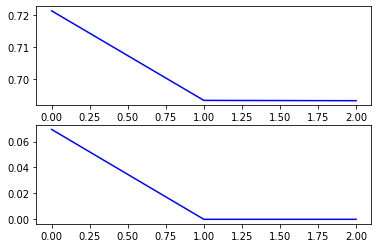

In [ ]:
f,ax=plt.subplots(2,1) 
ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')


#Accuracy
ax[1].plot(model.history.history['accuracy'],color='b',label='Training  Accuracy')


In [ ]:
y_pred=model.predict(test_X)
y_true=np.argmax(test_y,axis=1)
y_pred

array([[0.09995007, 0.10026318, 0.09979346, 0.09978136, 0.10005311,
        0.0998965 , 0.10023118, 0.100072  , 0.09995317, 0.10000592],
       [0.09995007, 0.10026318, 0.09979346, 0.09978136, 0.10005311,
        0.0998965 , 0.10023118, 0.100072  , 0.09995317, 0.10000592],
       [0.09995007, 0.10026318, 0.09979346, 0.09978136, 0.10005311,
        0.0998965 , 0.10023118, 0.100072  , 0.09995317, 0.10000592],
       [0.09995007, 0.10026318, 0.09979346, 0.09978136, 0.10005311,
        0.0998965 , 0.10023118, 0.100072  , 0.09995317, 0.10000592],
       [0.09995007, 0.10026318, 0.09979346, 0.09978136, 0.10005311,
        0.0998965 , 0.10023118, 0.100072  , 0.09995317, 0.10000592],
       [0.09995007, 0.10026318, 0.09979346, 0.09978136, 0.10005311,
        0.0998965 , 0.10023118, 0.100072  , 0.09995317, 0.10000592],
       [0.09995007, 0.10026318, 0.09979346, 0.09978136, 0.10005311,
        0.0998965 , 0.10023118, 0.100072  , 0.09995317, 0.10000592],
       [0.09995007, 0.10026318, 0.0997934

In [ ]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# *Nearest Centroid*



In [ ]:
from sklearn.neighbors import NearestCentroid

In [ ]:
clf = NearestCentroid()

In [ ]:
clf.fit(changed_x, changed_train_y.ravel())

NearestCentroid()

In [ ]:
a,b,c,d = test_X.shape
change = test_X.reshape(a,b*c*d)
change.shape

(12, 480000)

In [ ]:
clf.score(changed_x, changed_train_y)

0.6237623762376238

In [ ]:
clf.predict(change)

array([1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.], dtype=float32)

# SGD Classifier 

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
Sgd= make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))

In [ ]:
Sgd.fit(changed_x, changed_train_y.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [ ]:
Sgd.score(changed_x, changed_train_y)

0.8316831683168316

In [ ]:
Sgd.predict(change)

array([2., 0., 1., 1., 1., 0., 1., 1., 0., 0., 2., 2.], dtype=float32)